<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T4%20-%201%20-%20Linear%20Regression%20-%20Datos%20ficticios-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clonamos el repositorio para obtener los dataSet

In [1]:
!git clone https://github.com/joanby/python-ml-course.git

Cloning into 'python-ml-course'...
remote: Enumerating objects: 17706, done.
remote: Total 17706 (delta 0), reused 0 (delta 0), pack-reused 17706
Receiving objects: 100% (17706/17706), 523.15 MiB | 16.62 MiB/s, done.
Resolving deltas: 100% (333/333), done.
Checking out files: 100% (16940/16940), done.


# Damos acceso a nuestro Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# Test it
!ls '/content/drive/My Drive'

MessageError: ignored

In [3]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Modelos de Regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuídos según una N(1.5, 2.5)
* Ye = 5 + 1.8 * x + e
* e estará distribuído según una N(0, 0.8)

In [4]:
import pandas as pd
import numpy as np

In [5]:
x = 1.5 + 2.5 * np.random.randn(100)

In [6]:
res = 0 + 0.8 * np.random.randn(100)

In [7]:
y_pred = 5 + 1.8 * x

In [8]:
y_act = 5 + 1.8 * x + res

In [9]:
x_list = x.tolist() # Para formar el dataset
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [11]:
#Construyendo el dataset
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [12]:
data.head()

,x,y_actual,y_prediccion
0,0.601661,6.490912,6.082990
1,4.054194,12.604368,12.297549
2,0.674313,6.196706,6.213764
3,-2.019747,2.946566,1.364455
4,0.517553,6.521297,5.931595


In [13]:
import matplotlib.pyplot as plt

In [14]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

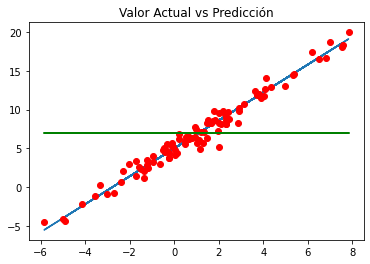

In [15]:
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.title("Valor Actual vs Predicción")

## ¿Como es la predicción de buena?
* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* $R^2$ = SSR / SST, coeficiente de determinación entre 0 y 1

In [16]:
y_m = np.mean(y_act)
data["SSR"]=(data["y_prediccion"]-y_m)**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-y_m)**2

In [17]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,0.601661,6.490912,6.082990,0.798721,0.166401,0.235992
1,4.054194,12.604368,12.297549,28.311415,0.094138,31.670625
2,0.674313,6.196706,6.213764,0.582074,0.000291,0.608392
3,-2.019747,2.946566,1.364455,31.497307,2.503072,16.241997
4,0.517553,6.521297,5.931595,1.092248,0.347749,0.207393


In [18]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [19]:
SSR

2439.119550627548

In [20]:
SSD

75.48163657775395

In [21]:
SST

2443.2726796351976

In [22]:
SSR+SSD

2514.601187205302

In [23]:
R2 = SSR/SST

In [24]:
R2

0.9983001778547822

(array([ 8., 14., 21., 26., 18.,  9.,  2.,  1.,  0.,  1.]),
 array([-1.71746778, -1.19163409, -0.66580041, -0.13996673,  0.38586695,
         0.91170063,  1.43753431,  1.963368  ,  2.48920168,  3.01503536,
         3.54086904]),
 <a list of 10 Patch objects>)

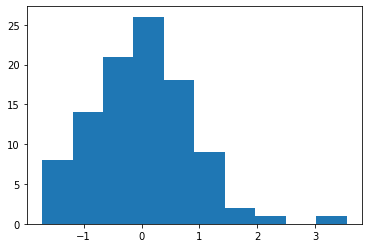

In [25]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo la recta de regresión 

* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [ ]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.4295087271088212, 5.4293119653299815)

In [ ]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [ ]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [ ]:
alpha = y_mean - beta * x_mean

In [ ]:
alpha, beta

(5.019817505840673, 0.28645817386334554)

El modelo lineal obtenido por regresión es:
y = 5.042341442370516 + 1.9044490309709992 * x

In [ ]:
data["y_model"] = alpha + beta * data["x"]

In [ ]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,0.445763,5.181348,5.133729,0.087369,0.002268,0.061486,0.243934,0.967756,5.147510
1,1.922469,6.190295,5.576741,0.021735,0.376449,0.579095,0.375135,0.243010,5.570525
2,0.756439,6.325118,5.226932,0.040958,1.206014,0.802469,-0.602940,0.453023,5.236506
3,1.758071,5.847538,5.527421,0.009625,0.102475,0.174913,0.137413,0.107953,5.523431
4,-1.579013,3.990324,4.526296,0.815438,0.287266,2.070686,4.329227,9.051206,4.567496


In [ ]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [ ]:
SSR, SSD, SST

(49.88237713027072, 51.328022863583286, 101.210399993854)

In [ ]:
R2 = SSR / SST
R2

0.49285821549267494

Text(0.5, 1.0, 'Valor Actual vs Predicción')

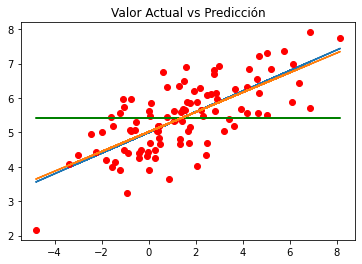

In [ ]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE)

In [ ]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.7237094274242161

In [ ]:
np.mean(data["y_actual"])

5.4293119653299815

In [ ]:
RSE / np.mean(data["y_actual"])

0.13329671089921072